<a href="https://colab.research.google.com/github/koki-223/my-first-Repository/blob/main/Copy_of_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

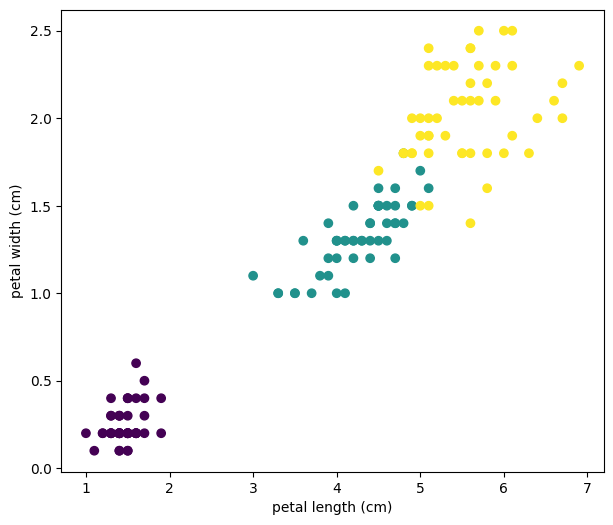

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [5]:
#TODO
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Training samples: {X_train.shape[0]}')
print(f'Testing samples: {X_test.shape[0]}')


Training samples: 120
Testing samples: 30


#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

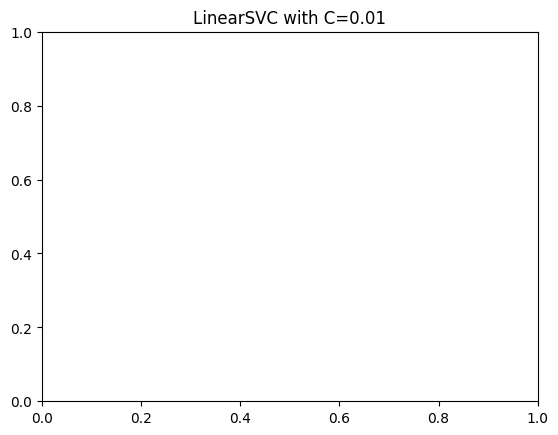

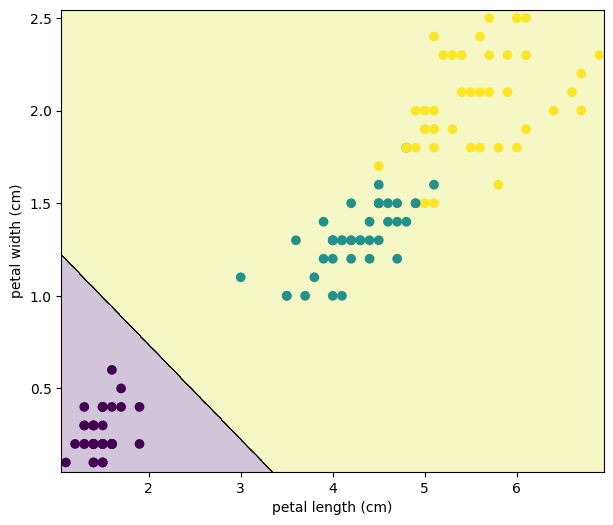

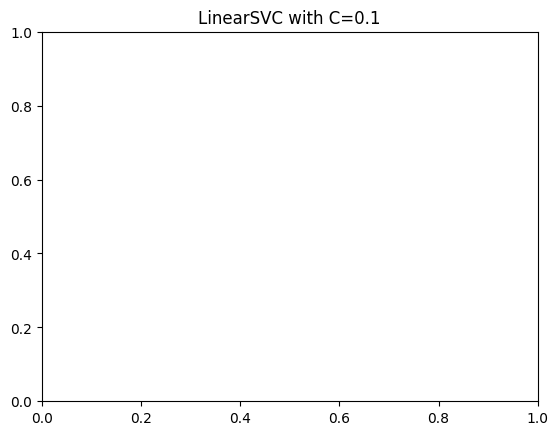

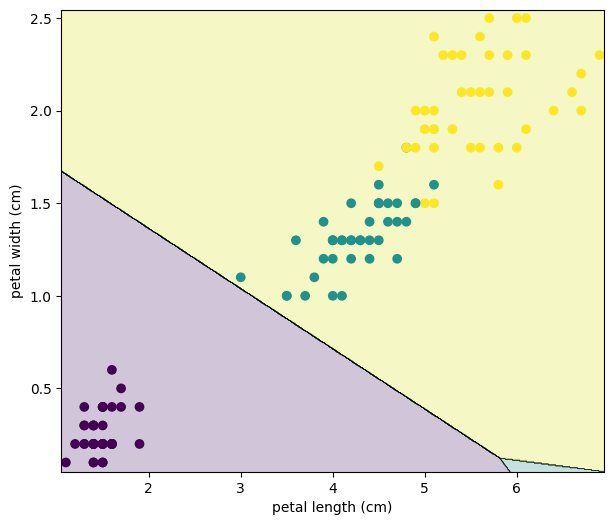

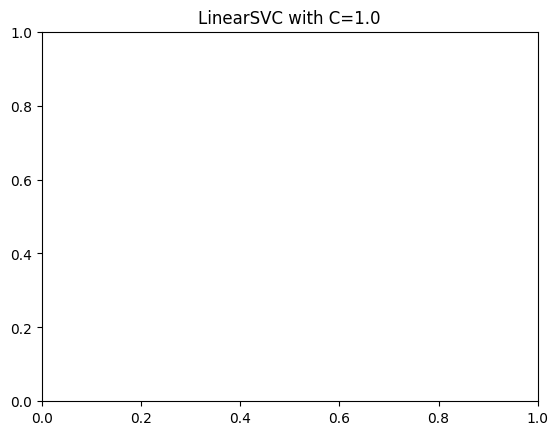

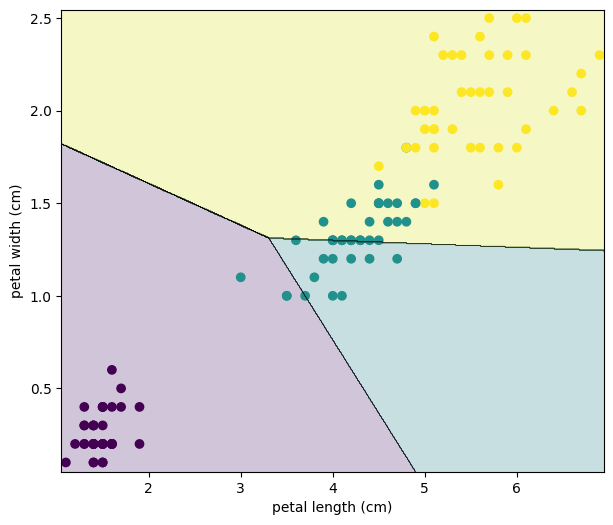

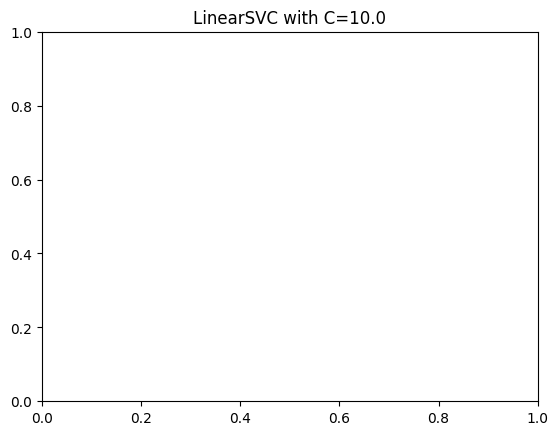

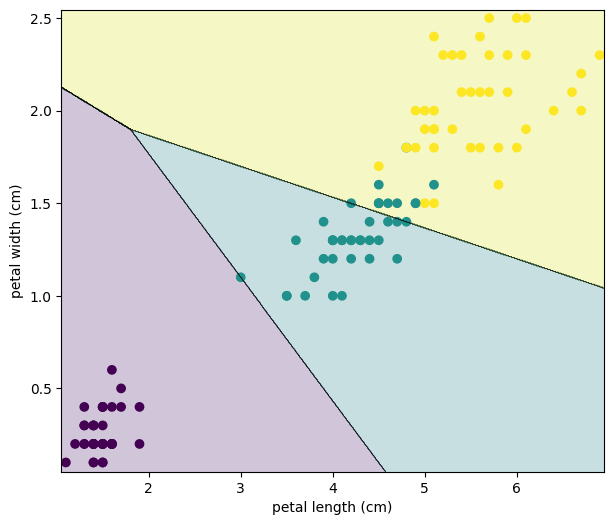

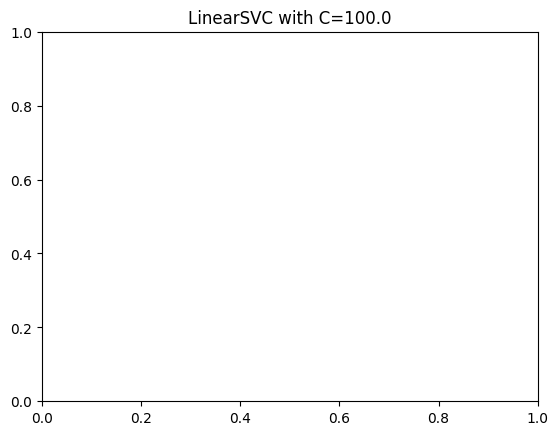

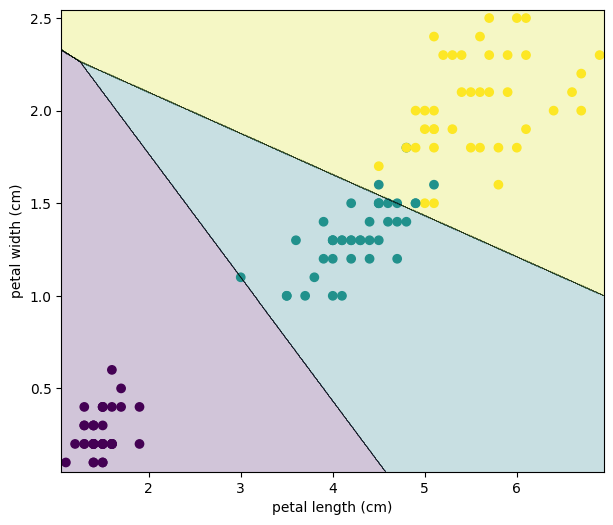

In [6]:
#TODO
from sklearn.svm import LinearSVC

C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for C in C_values:
    clf = LinearSVC(loss='hinge', C=C, max_iter=100000, random_state=42)
    clf.fit(X_train, y_train)

    plt.title(f'LinearSVC with C={C}')
    plot_decision_boundary(clf, X_train, y_train)
    plt.show()


#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [7]:
#TODO
# เลือกค่า C ที่ชอบ
C_chosen = 1.0

# สร้างโมเดลและเทรน
clf = LinearSVC(loss='hinge', C=C_chosen, max_iter=100000, random_state=42)
clf.fit(X_train, y_train)

# ทำนายผลบน test set
y_pred = clf.predict(X_test)

# คำนวณ test error (อัตราผิดพลาด)
test_error = np.mean(y_pred != y_test)
print(f'Test error with C={C_chosen}: {test_error:.4f}')

# หรือถ้าชอบแสดง accuracy
test_accuracy = np.mean(y_pred == y_test)
print(f'Test accuracy with C={C_chosen}: {test_accuracy:.4f}')


Test error with C=1.0: 0.3000
Test accuracy with C=1.0: 0.7000


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

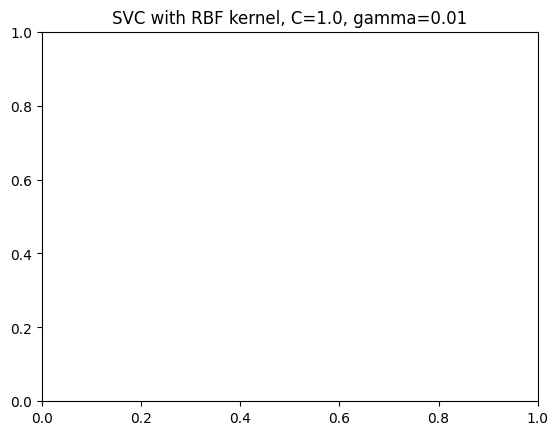

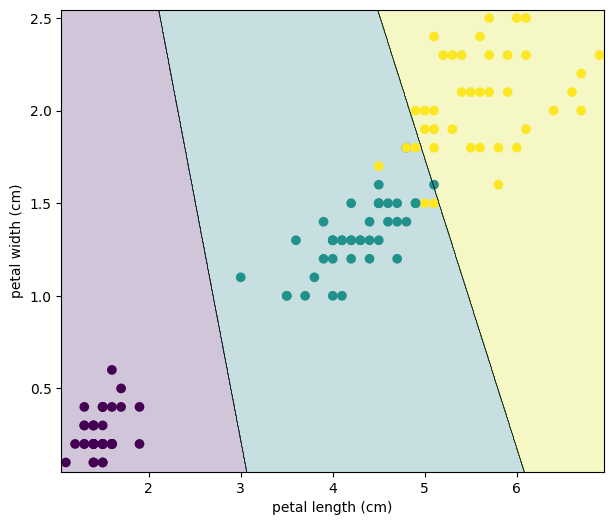

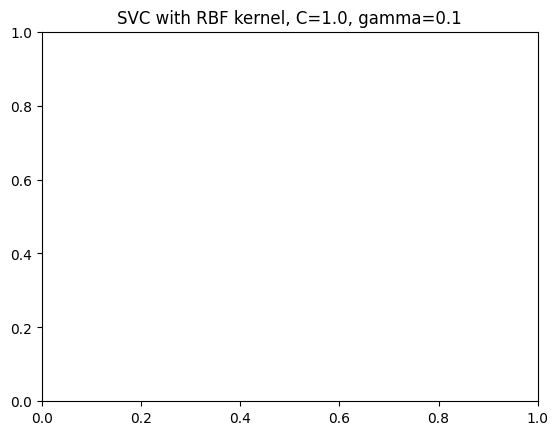

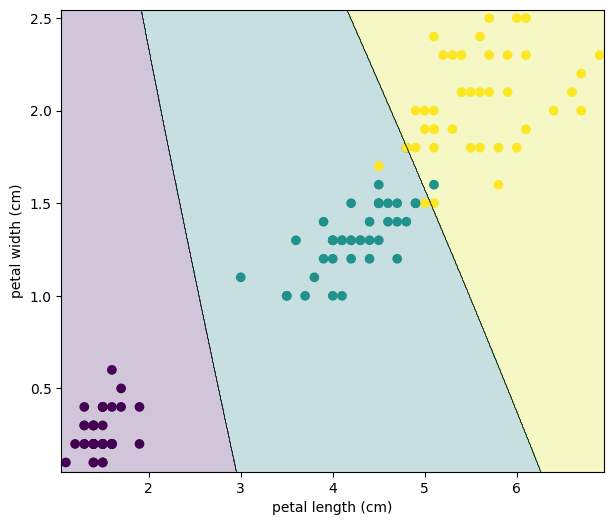

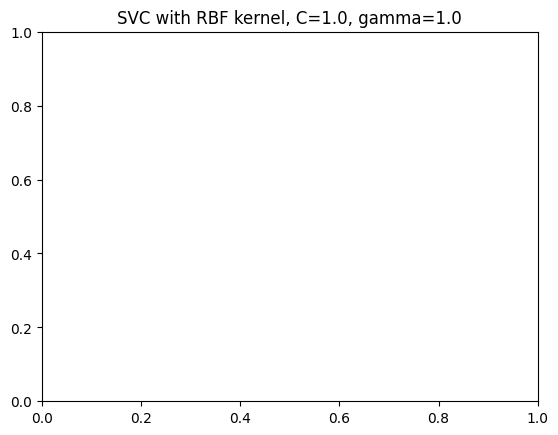

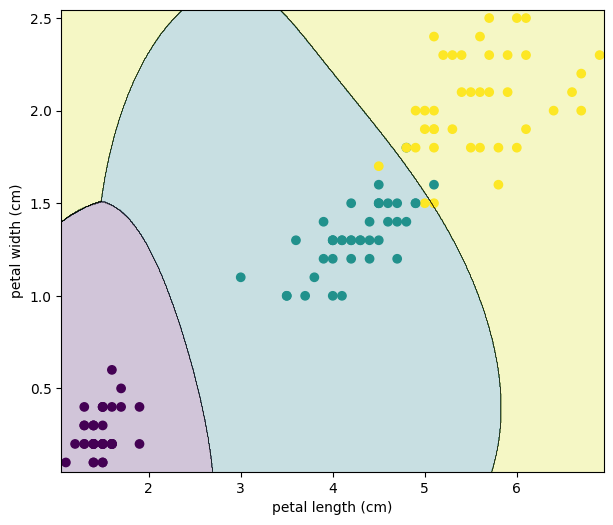

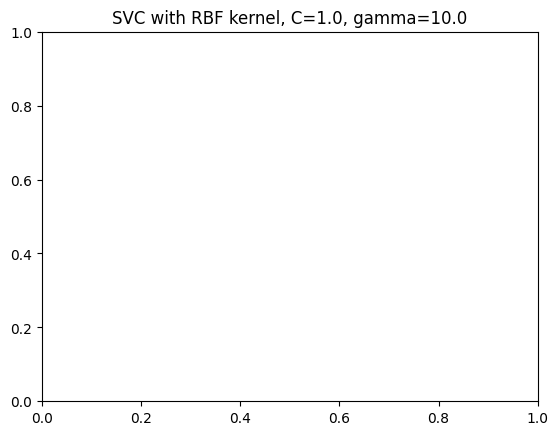

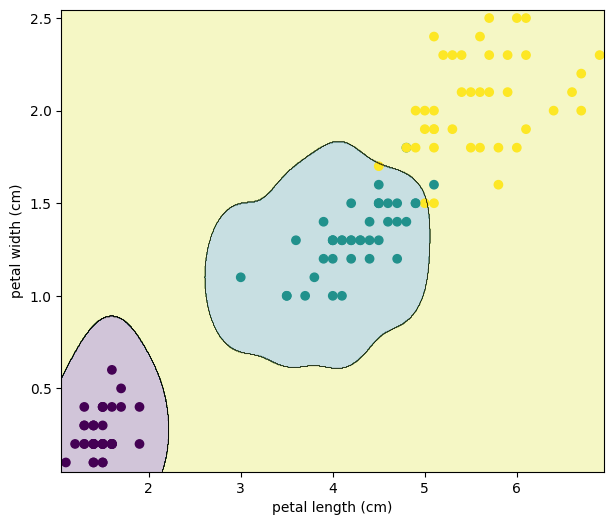

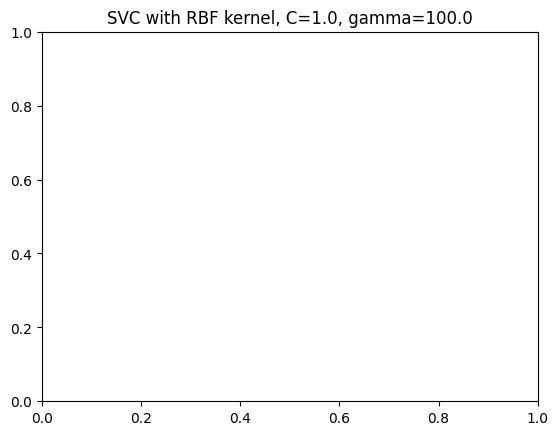

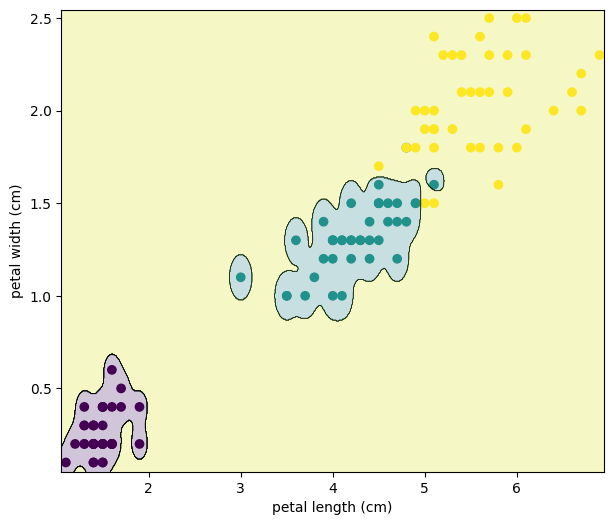

In [8]:
#TODO
from sklearn.svm import SVC

C = 1.0
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for gamma in gamma_values:
    clf = SVC(kernel='rbf', C=C, gamma=gamma, max_iter=100000, random_state=42)
    clf.fit(X_train, y_train)

    plt.title(f'SVC with RBF kernel, C={C}, gamma={gamma}')
    plot_decision_boundary(clf, X_train, y_train)
    plt.show()


#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [9]:
#TODO
# เลือก gamma ที่ชอบ
gamma_chosen = 0.1
C = 1.0

# สร้างและเทรนโมเดล
clf = SVC(kernel='rbf', C=C, gamma=gamma_chosen, max_iter=100000, random_state=42)
clf.fit(X_train, y_train)

# ทำนายผลบน test set
y_pred = clf.predict(X_test)

# คำนวณ test error
test_error = np.mean(y_pred != y_test)
print(f'Test error with gamma={gamma_chosen}: {test_error:.4f}')

# จำนวน support vectors ต่อแต่ละ class
num_support_vectors = clf.n_support_
print(f'Number of support vectors per class: {num_support_vectors}')
print(f'Total support vectors: {sum(num_support_vectors)}')


Test error with gamma=0.1: 0.0667
Number of support vectors per class: [ 4 20 18]
Total support vectors: 42


*italicized text*#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot


In [10]:
#TODO
# Linear SVM
linear_clf = LinearSVC(loss='hinge', C=1.0, max_iter=100000, random_state=42)
linear_clf.fit(X_train, y_train)
y_pred_linear = linear_clf.predict(X_test)
acc_linear = np.mean(y_pred_linear == y_test)

# Kernel SVM
kernel_clf = SVC(kernel='rbf', C=1.0, gamma=0.1, max_iter=100000, random_state=42)
kernel_clf.fit(X_train, y_train)
y_pred_kernel = kernel_clf.predict(X_test)
acc_kernel = np.mean(y_pred_kernel == y_test)

print(f"Test Accuracy - Linear SVM: {acc_linear:.4f}")
print(f"Test Accuracy - Kernel SVM (RBF): {acc_kernel:.4f}")


Test Accuracy - Linear SVM: 0.7000
Test Accuracy - Kernel SVM (RBF): 0.9333
